Assignment 1: Neural Networks
    Yashwanth Reddy Sadala

loading in all required modules

In [9]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense

from keras.datasets import imdb

IMDB data loading

In [10]:
(traindata, trainlabels), (testdata, testlabels) = imdb.load_data(
num_words=10000)

*Vectorizing* the data

In [11]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [12]:
x_training = vectorize_sequences(traindata)
x_testing = vectorize_sequences(testdata)


In [13]:
y_training = np.asarray(trainlabels).astype('float32')
y_testing = np.asarray(testlabels).astype('float32')
print("y_training ", y_training.shape)
print("y_testing ", y_testing.shape)

y_training  (25000,)
y_testing  (25000,)


In [14]:
x_value = x_training[:10000]
partial_x_training = x_training[10000:]
y_value = y_training[:10000]
partial_y_training = y_training[10000:]


Building a model with two hidden layers, 16 hidden units, and the relu activation function

In [16]:
model = models.Sequential()
model.add(layers.Dense(16,  activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Utilizing the binary crossentropy loss function and the rnsprob optimizer to compile the model

In [18]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_training, partial_y_training, epochs=20, batch_size=512, validation_data=(x_value, y_value))

results = model.evaluate(x_testing, y_testing)
print("_"*100)
print("Test Loss & Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

Epoch 1/20


30/30 [==============================] - 6s 133ms/step - loss: 0.5715 - acc: 0.7635 - val_loss: 0.4512 - val_acc: 0.8534
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3782 - acc: 0.8809 - val_loss: 0.3645 - val_acc: 0.8569
Epoch 3/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2824 - acc: 0.9077 - val_loss: 0.3074 - val_acc: 0.8794
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2299 - acc: 0.9219 - val_loss: 0.3150 - val_acc: 0.8731
Epoch 5/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1932 - acc: 0.9349 - val_loss: 0.2804 - val_acc: 0.8874
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1670 - acc: 0.9464 - val_loss: 0.2772 - val_acc: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1426 - acc: 0.9550 - val_loss: 0.2838 - val_acc: 0.8863
Epoch 8/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1248 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Plotting training and validation accuracy

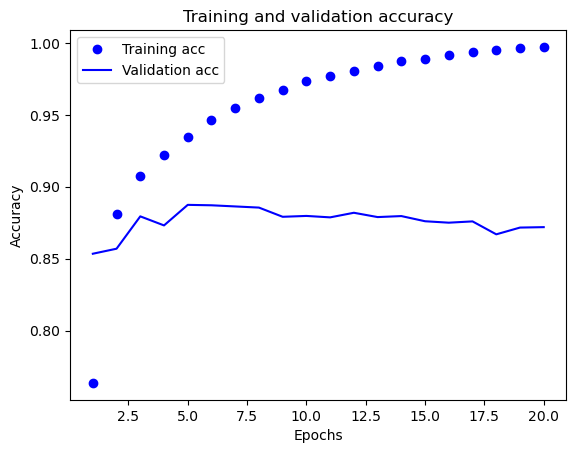

In [19]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, (len(history_dict['acc']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Plotting training and validation loss

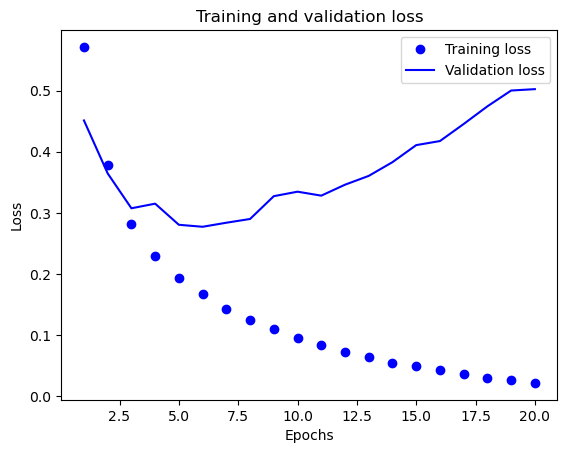

In [20]:
plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Building model using one hidden layer with 16 hidden units and relu activation function

In [21]:
model1 = models.Sequential()
model.add(layers.Dense(16,  activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history1 = model1.fit(partial_x_training, partial_y_training, epochs=20, batch_size=512, validation_data=(x_value, y_value))

results1 = model1.evaluate(x_testing, y_testing)
print("_"*100)
print("Test Loss & Accuracy")
print("results1 ", results1)
history_dict1 = history1.history
history_dict1.keys()

Epoch 1/20
30/30 [==============================] - 5s 125ms/step - loss: 0.6168 - acc: 0.7441 - val_loss: 0.5639 - val_acc: 0.8076
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5186 - acc: 0.8479 - val_loss: 0.4993 - val_acc: 0.8427
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4572 - acc: 0.8710 - val_loss: 0.4536 - val_acc: 0.8541
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.4117 - acc: 0.8826 - val_loss: 0.4212 - val_acc: 0.8587
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3763 - acc: 0.8926 - val_loss: 0.3948 - val_acc: 0.8662
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3484 - acc: 0.9001 - val_loss: 0.3752 - val_acc: 0.8709
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3256 - acc: 0.9061 - val_loss: 0.3575 - val_acc: 0.8766
Epoch 8/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3065 - 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Building model using three hidden layer with 16 hidden units and relu activation function

In [23]:
model2 = models.Sequential()
model2.add(layers.Dense(16,  activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history2 = model2.fit(partial_x_training, partial_y_training, epochs=20, batch_size=512, validation_data=(x_value, y_value))

results2 = model2.evaluate(x_testing, y_testing)
print("_"*100)
print("Test Loss & Accuracy")
print("results2 ", results2)
history_dict2 = history2.history
history_dict2.keys()

Epoch 1/20
30/30 [==============================] - 5s 90ms/step - loss: 0.6007 - acc: 0.6793 - val_loss: 0.5161 - val_acc: 0.8422
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4222 - acc: 0.8741 - val_loss: 0.3674 - val_acc: 0.8745
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2862 - acc: 0.9131 - val_loss: 0.3036 - val_acc: 0.8844
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2149 - acc: 0.9313 - val_loss: 0.2848 - val_acc: 0.8856
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1732 - acc: 0.9437 - val_loss: 0.2868 - val_acc: 0.8861
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1413 - acc: 0.9561 - val_loss: 0.2957 - val_acc: 0.8833
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1174 - acc: 0.9637 - val_loss: 0.3015 - val_acc: 0.8845
Epoch 8/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0997 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Now lets try with 32 hidden units instead of 16 and one hidden layer

In [25]:
model3 = models.Sequential()
model3.add(layers.Dense(32,  activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history3 = model3.fit(partial_x_training, partial_y_training, epochs=20, batch_size=512, validation_data=(x_value, y_value))

results3 = model3.evaluate(x_testing, y_testing)
print("_"*100)
print("Test Loss & Accuracy")
print("results3 ", results3)
history_dict3 = history3.history
history_dict3.keys()

Epoch 1/20
30/30 [==============================] - 5s 100ms/step - loss: 0.4986 - acc: 0.7799 - val_loss: 0.3772 - val_acc: 0.8715
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3173 - acc: 0.8963 - val_loss: 0.3121 - val_acc: 0.8843
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2500 - acc: 0.9184 - val_loss: 0.2917 - val_acc: 0.8873
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2158 - acc: 0.9268 - val_loss: 0.2813 - val_acc: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1835 - acc: 0.9415 - val_loss: 0.3039 - val_acc: 0.8750
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1663 - acc: 0.9482 - val_loss: 0.2930 - val_acc: 0.8804
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1486 - acc: 0.9534 - val_loss: 0.3168 - val_acc: 0.8753
Epoch 8/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1340 - 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Now lets try with 64 units and one hidden layer


In [27]:
model4 = models.Sequential()
model4.add(layers.Dense(64,  activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(1, activation='sigmoid'))

In [28]:
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history4 = model4.fit(partial_x_training, partial_y_training, epochs=20, batch_size=512, validation_data=(x_value, y_value))

results4 = model4.evaluate(x_testing, y_testing)
print("_"*100)
print("Test Loss & Accuracy")
print("results4 ", results4)
history_dict4 = history4.history
history_dict4.keys()

Epoch 1/20
30/30 [==============================] - 5s 118ms/step - loss: 0.5071 - acc: 0.7695 - val_loss: 0.3704 - val_acc: 0.8705
Epoch 2/20
30/30 [==============================] - 2s 64ms/step - loss: 0.3140 - acc: 0.8947 - val_loss: 0.3070 - val_acc: 0.8841
Epoch 3/20
30/30 [==============================] - 2s 55ms/step - loss: 0.2497 - acc: 0.9136 - val_loss: 0.3068 - val_acc: 0.8735
Epoch 4/20
30/30 [==============================] - 2s 53ms/step - loss: 0.2121 - acc: 0.9247 - val_loss: 0.2785 - val_acc: 0.8867
Epoch 5/20
30/30 [==============================] - 2s 68ms/step - loss: 0.1837 - acc: 0.9393 - val_loss: 0.3114 - val_acc: 0.8739
Epoch 6/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1641 - acc: 0.9439 - val_loss: 0.2910 - val_acc: 0.8834
Epoch 7/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1468 - acc: 0.9507 - val_loss: 0.3208 - val_acc: 0.8745
Epoch 8/20
30/30 [==============================] - 2s 70ms/step - loss: 0.1329 - 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Now lets replace binary_crossentropy loss function with mse

In [29]:
model5 = models.Sequential()
model5.add(layers.Dense(16,  activation='relu', input_shape=(10000,)))
model5.add(layers.Dense(1, activation='sigmoid'))

In [30]:
model5.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])

history5 = model5.fit(partial_x_training, partial_y_training, epochs=20, batch_size=512, validation_data=(x_value, y_value))

results5 = model5.evaluate(x_testing, y_testing)
print("_"*100)
print("Test Loss & Accuracy")
print("results5 ", results5)
history_dict5 = history5.history
history_dict5.keys()

Epoch 1/20
30/30 [==============================] - 4s 106ms/step - loss: 0.1806 - acc: 0.7742 - val_loss: 0.1361 - val_acc: 0.8525
Epoch 2/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1124 - acc: 0.8821 - val_loss: 0.1072 - val_acc: 0.8775
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0874 - acc: 0.9073 - val_loss: 0.1008 - val_acc: 0.8756
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0746 - acc: 0.9188 - val_loss: 0.0910 - val_acc: 0.8857
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0659 - acc: 0.9285 - val_loss: 0.0892 - val_acc: 0.8833
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0594 - acc: 0.9370 - val_loss: 0.0869 - val_acc: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0540 - acc: 0.9453 - val_loss: 0.0851 - val_acc: 0.8863
Epoch 8/20
30/30 [==============================] - 2s 61ms/step - loss: 0.0499 - 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Using tanh function instead of relu

In [31]:
model6 = models.Sequential()
model6.add(layers.Dense(16,  activation='tanh', input_shape=(10000,)))
model6.add(layers.Dense(1, activation='sigmoid'))

In [32]:
model6.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history6 = model6.fit(partial_x_training, partial_y_training, epochs=20, batch_size=512, validation_data=(x_value, y_value))

results6= model6.evaluate(x_testing, y_testing)
print("_"*100)
print("Test Loss & Accuracy")
print("results6 ", results6)
history_dict6 = history6.history
history_dict6.keys()

Epoch 1/20
30/30 [==============================] - 10s 279ms/step - loss: 0.5131 - acc: 0.7965 - val_loss: 0.4189 - val_acc: 0.8534
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3468 - acc: 0.8933 - val_loss: 0.3418 - val_acc: 0.8770
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2758 - acc: 0.9151 - val_loss: 0.3025 - val_acc: 0.8864
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2327 - acc: 0.9276 - val_loss: 0.2940 - val_acc: 0.8822
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2020 - acc: 0.9365 - val_loss: 0.2814 - val_acc: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1778 - acc: 0.9451 - val_loss: 0.2722 - val_acc: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1592 - acc: 0.9501 - val_loss: 0.2734 - val_acc: 0.8858
Epoch 8/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1424 -

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Using drop out for three hidden layers with 64 units, MSE loss function and RELU

In [33]:
model7 = models.Sequential()
model7.add(layers.Dense(16,  activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model7.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model7.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model7.add(layers.Dense(1, activation='sigmoid'))

In [34]:
model7.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])

history7 = model7.fit(partial_x_training, partial_y_training, epochs=20, batch_size=512, validation_data=(x_value, y_value))

results7= model7.evaluate(x_testing, y_testing)
print("_"*100)
print("Test Loss & Accuracy")
print("results7 ", results7)
history_dict7 = history7.history
history_dict7.keys()

Epoch 1/20
30/30 [==============================] - 4s 95ms/step - loss: 0.1983 - acc: 0.7220 - val_loss: 0.1420 - val_acc: 0.8478
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1121 - acc: 0.8787 - val_loss: 0.1007 - val_acc: 0.8823
Epoch 3/20
30/30 [==============================] - 1s 48ms/step - loss: 0.0793 - acc: 0.9107 - val_loss: 0.0921 - val_acc: 0.8806
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0623 - acc: 0.9287 - val_loss: 0.0874 - val_acc: 0.8848
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0512 - acc: 0.9435 - val_loss: 0.1012 - val_acc: 0.8628
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0446 - acc: 0.9493 - val_loss: 0.0911 - val_acc: 0.8792
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0390 - acc: 0.9575 - val_loss: 0.0857 - val_acc: 0.8815
Epoch 8/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0330 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

one layer with drop out of 0.5

In [35]:
model8 = models.Sequential()
model8.add(layers.Dense(16,  activation='relu', input_shape=(10000,)))
model8.add(layers.Dropout(0.5))
model8.add(layers.Dense(1, activation='sigmoid'))

In [36]:
model8.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history8 = model8.fit(partial_x_training, partial_y_training, epochs=20, batch_size=512, validation_data=(x_value, y_value))

results8= model8.evaluate(x_testing, y_testing)
print("_"*100)
print("Test Loss & Accuracy")
print("results8 ", results8)
history_dict8 = history8.history
history_dict8.keys()

Epoch 1/20
30/30 [==============================] - 4s 98ms/step - loss: 0.5458 - acc: 0.7395 - val_loss: 0.4278 - val_acc: 0.8591
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3958 - acc: 0.8498 - val_loss: 0.3559 - val_acc: 0.8739
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.3278 - acc: 0.8869 - val_loss: 0.3488 - val_acc: 0.8600
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2888 - acc: 0.9001 - val_loss: 0.2978 - val_acc: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 48ms/step - loss: 0.2560 - acc: 0.9155 - val_loss: 0.2848 - val_acc: 0.8875
Epoch 6/20
30/30 [==============================] - 2s 55ms/step - loss: 0.2299 - acc: 0.9218 - val_loss: 0.2894 - val_acc: 0.8859
Epoch 7/20
30/30 [==============================] - 2s 57ms/step - loss: 0.2135 - acc: 0.9284 - val_loss: 0.2725 - val_acc: 0.8879
Epoch 8/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1922 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Using l1 regulariser

In [37]:
model9 = models.Sequential()
model9.add(layers.Dense(64,  activation='relu', activity_regularizer = regularizers.L1(0.01),input_shape=(10000,)))
model9.add(layers.Dense(1, activation='sigmoid'))

In [38]:
model9.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history9 = model9.fit(partial_x_training, partial_y_training, epochs=20, batch_size=512, validation_data=(x_value, y_value))

results9= model9.evaluate(x_testing, y_testing)
print("_"*100)
print("Test Loss & Accuracy")
print("results9 ", results9)
history_dict9 = history9.history
history_dict9.keys()

Epoch 1/20
30/30 [==============================] - 6s 167ms/step - loss: 0.5619 - acc: 0.7847 - val_loss: 0.4576 - val_acc: 0.8668
Epoch 2/20
30/30 [==============================] - 4s 118ms/step - loss: 0.4003 - acc: 0.8948 - val_loss: 0.3989 - val_acc: 0.8820
Epoch 3/20
30/30 [==============================] - 3s 101ms/step - loss: 0.3345 - acc: 0.9212 - val_loss: 0.3730 - val_acc: 0.8896
Epoch 4/20
30/30 [==============================] - 2s 76ms/step - loss: 0.2921 - acc: 0.9385 - val_loss: 0.3697 - val_acc: 0.8840
Epoch 5/20
30/30 [==============================] - 2s 71ms/step - loss: 0.2617 - acc: 0.9506 - val_loss: 0.3558 - val_acc: 0.8878
Epoch 6/20
30/30 [==============================] - 3s 87ms/step - loss: 0.2360 - acc: 0.9599 - val_loss: 0.3554 - val_acc: 0.8852
Epoch 7/20
30/30 [==============================] - 2s 51ms/step - loss: 0.2147 - acc: 0.9691 - val_loss: 0.3751 - val_acc: 0.8794
Epoch 8/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1976 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Using l2 regulariser

In [39]:
model10 = models.Sequential()
model10.add(layers.Dense(64,  activation='relu', activity_regularizer = regularizers.L2(0.01),input_shape=(10000,)))
model10.add(layers.Dense(1, activation='sigmoid'))

In [40]:
model10.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history10 = model10.fit(partial_x_training, partial_y_training, epochs=20, batch_size=512, validation_data=(x_value, y_value))

results10= model10.evaluate(x_testing, y_testing)
print("_"*100)
print("Test Loss & Accuracy")
print("results10 ", results10)
history_dict10 = history10.history
history_dict10.keys()

Epoch 1/20
30/30 [==============================] - 5s 118ms/step - loss: 0.5377 - acc: 0.7691 - val_loss: 0.4094 - val_acc: 0.8734
Epoch 2/20
30/30 [==============================] - 2s 60ms/step - loss: 0.3574 - acc: 0.8922 - val_loss: 0.3596 - val_acc: 0.8802
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2885 - acc: 0.9223 - val_loss: 0.3315 - val_acc: 0.8888
Epoch 4/20
30/30 [==============================] - 1s 49ms/step - loss: 0.2544 - acc: 0.9317 - val_loss: 0.3207 - val_acc: 0.8858
Epoch 5/20
30/30 [==============================] - 2s 52ms/step - loss: 0.2197 - acc: 0.9491 - val_loss: 0.3287 - val_acc: 0.8790
Epoch 6/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1940 - acc: 0.9604 - val_loss: 0.3290 - val_acc: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 50ms/step - loss: 0.1767 - acc: 0.9639 - val_loss: 0.3220 - val_acc: 0.8808
Epoch 8/20
30/30 [==============================] - 2s 73ms/step - loss: 0.1576 - 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Using adam optimizer instead of rmsprop

In [41]:
model11= models.Sequential()
model11.add(layers.Dense(64,  activation='relu', activity_regularizer = regularizers.L1(0.01),input_shape=(10000,)))
model11.add(layers.Dense(1, activation='sigmoid'))

In [44]:
model11.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history11 = model11.fit(partial_x_training, partial_y_training, epochs=20, batch_size=512, validation_data=(x_value, y_value))

results11= model11.evaluate(x_testing, y_testing)
print("_"*100)
print("Test Loss & Accuracy")
print("results11 ", results11)
history_dict11 = history11.history
history_dict11.keys()

Epoch 1/20
30/30 [==============================] - 5s 117ms/step - loss: 0.0535 - acc: 0.9996 - val_loss: 0.3882 - val_acc: 0.8696
Epoch 2/20
30/30 [==============================] - 2s 68ms/step - loss: 0.0514 - acc: 0.9997 - val_loss: 0.4049 - val_acc: 0.8666
Epoch 3/20
30/30 [==============================] - 2s 81ms/step - loss: 0.0512 - acc: 0.9997 - val_loss: 0.4008 - val_acc: 0.8680
Epoch 4/20
30/30 [==============================] - 2s 69ms/step - loss: 0.0501 - acc: 0.9997 - val_loss: 0.3915 - val_acc: 0.8686
Epoch 5/20
30/30 [==============================] - 2s 69ms/step - loss: 0.0489 - acc: 0.9997 - val_loss: 0.3907 - val_acc: 0.8697
Epoch 6/20
30/30 [==============================] - 2s 72ms/step - loss: 0.0476 - acc: 0.9997 - val_loss: 0.3923 - val_acc: 0.8696
Epoch 7/20
30/30 [==============================] - 2s 70ms/step - loss: 0.0469 - acc: 0.9997 - val_loss: 0.3883 - val_acc: 0.8701
Epoch 8/20
30/30 [==============================] - 2s 54ms/step - loss: 0.0465 - 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])